# 5xFAD Resting State Analysis

Analysis of resting state EEG data from 5xFAD mice model.

## Setup and Dependencies

In [1]:
using Pkg
Pkg.activate("../..")
Pkg.status()
include("../../modules/sessionIO/SessionIO.jl")
include("../../../zzz configs/custom/plotify.jl")
using CairoMakie

  Activating project at `~/Documents/Kaizen/code/neuroelectrophysiology`
project at `~/Documents/Kaizen/code/neuroelectrophysiology`


Status `~/Documents/Kaizen/code/neuroelectrophysiology/Project.toml`
⌃ [13f3f980] CairoMakie v0.13.10
  [717857b8] DSP v0.8.4
  [a93c6f00] DataFrames v1.7.0
  [7a1cc6ca] FFTW v1.9.0
  [f67ccb44] HDF5 v0.17.2
  [0f8b85d8] JSON3 v1.14.3
  [7f904dfe] PlutoUI v0.7.68
  [2913bbd2] StatsBase v0.34.5
  [69a5ce3b] UnfoldMakie v0.5.19
  [29a6e085] Wavelets v0.10.1
Info Packages marked with ⌃ have new versions available and may be upgradable.
`~/Documents/Kaizen/code/neuroelectrophysiology/Project.toml`
⌃ [13f3f980] CairoMakie v0.13.10
  [717857b8] DSP v0.8.4
  [a93c6f00] DataFrames v1.7.0
  [7a1cc6ca] FFTW v1.9.0
  [f67ccb44] HDF5 v0.17.2
  [0f8b85d8] JSON3 v1.14.3
  [7f904dfe] PlutoUI v0.7.68
  [2913bbd2] StatsBase v0.34.5
  [69a5ce3b] UnfoldMakie v0.5.19
  [29a6e085] Wavelets v0.10.1
Info Packages marked with ⌃ have new versions available and may be upgradable.


### Load Sessions + Select

In [2]:
# load sessions
sessions = begin
	datapath = "5xFAD-resting-state-preprocessed"
	files = readdir(datapath)
	[from_hdf5(joinpath(datapath, file)) for file in files]
end

# display available files
println("Available session files:")
for (i, file) in enumerate(files)
    println("$i. $file")
end

┌ Info: raw: Transposing (35323, 6) to (6, 35323) [channels, samples]
└ @ Main /Users/fomo/Documents/Kaizen/code/neuroelectrophysiology/modules/sessionIO/SessionIO.jl:131
┌ Info: preprocessed: Transposing (35323, 5) to (5, 35323) [channels, samples]
└ @ Main /Users/fomo/Documents/Kaizen/code/neuroelectrophysiology/modules/sessionIO/SessionIO.jl:131
┌ Info: data: Permuting (100, 5, 3523) to (5, 100, 3523) [5 channels, 100 samples, 3523 trials]
└ @ Main /Users/fomo/Documents/Kaizen/code/neuroelectrophysiology/modules/sessionIO/SessionIO.jl:182
┌ Info: raw: Keeping (6, 35323) [channels, samples]
└ @ Main /Users/fomo/Documents/Kaizen/code/neuroelectrophysiology/modules/sessionIO/SessionIO.jl:134
┌ Info: data: Permuting (100, 5, 3523) to (5, 100, 3523) [5 channels, 100 samples, 3523 trials]
└ @ Main /Users/fomo/Documents/Kaizen/code/neuroelectrophysiology/modules/sessionIO/SessionIO.jl:182
┌ Info: raw: Keeping (6, 35323) [channels, samples]
└ @ Main /Users/fomo/Documents/Kaizen/code/neuroel

Available session files:
1. 2023-08-25_14-20-15.h5
2. 2023-08-25_15-32-14.h5
3. 2023-08-25_16-48-03.h5
4. 2023-08-25_17-48-53.h5
5. 2023-08-25_18-47-30.h5
6. 2023-08-25_19-39-21.h5
7. 2023-08-25_20-33-11.h5
8. 2023-08-25_21-35-02.h5
9. 2023-08-25_22-02-17.h5
10. 2023-08-25_23-24-25.h5
11. 2023-08-26_00-12-57.h5
12. 2023-08-26_00-58-14.h5
13. 2023-08-26_01-43-12.h5
14. 2023-08-26_02-33-36.h5
15. 2023-09-06_15-06-20.h5
16. 2023-09-06_17-32-01.h5
17. 2023-09-06_19-26-36.h5


┌ Info: preprocessed: Keeping (5, 30521) [channels, samples]
└ @ Main /Users/fomo/Documents/Kaizen/code/neuroelectrophysiology/modules/sessionIO/SessionIO.jl:134
┌ Info: data: Permuting (5, 100, 3043) to (5, 100, 3043) [5 channels, 100 samples, 3043 trials]
└ @ Main /Users/fomo/Documents/Kaizen/code/neuroelectrophysiology/modules/sessionIO/SessionIO.jl:182
┌ Info: raw: Transposing (30450, 6) to (6, 30450) [channels, samples]
└ @ Main /Users/fomo/Documents/Kaizen/code/neuroelectrophysiology/modules/sessionIO/SessionIO.jl:131
┌ Info: preprocessed: Transposing (30450, 5) to (5, 30450) [channels, samples]
└ @ Main /Users/fomo/Documents/Kaizen/code/neuroelectrophysiology/modules/sessionIO/SessionIO.jl:131
┌ Info: data: Permuting (100, 5, 3036) to (5, 100, 3036) [5 channels, 100 samples, 3036 trials]
└ @ Main /Users/fomo/Documents/Kaizen/code/neuroelectrophysiology/modules/sessionIO/SessionIO.jl:182
┌ Info: raw: Keeping (6, 30450) [channels, samples]
└ @ Main /Users/fomo/Documents/Kaizen/cod

In [5]:
# Select which session to analyze (change this index)
selected_file_index = 1
selection = files[selected_file_index]
name = splitext(selection)[1]
matching = filter(s -> s.session == name, sessions)
if isempty(matching)
	error("no session found with ID: $selection")
elseif length(matching) > 1
	@warn "Multiple sessions found with ID: $selection"
end
session = first(matching)
println("Session ID: $(session.session)")
println("Sampling Rate: $(session.sampling_rate) Hz")
println("Data Shape: $(size(session.raw))")
println("Good Channels: $(session.good_channels)")
println("Number of Good Channels: $(length(session.good_channels))")

Session ID: 2023-08-25_14-20-15
Sampling Rate: 100 Hz
Data Shape: (6, 35323)
Good Channels: [1, 2, 3, 4, 5]
Number of Good Channels: 5


## Analysis
### Raw EEG Visualization

Visualizing samples 1 to 1000


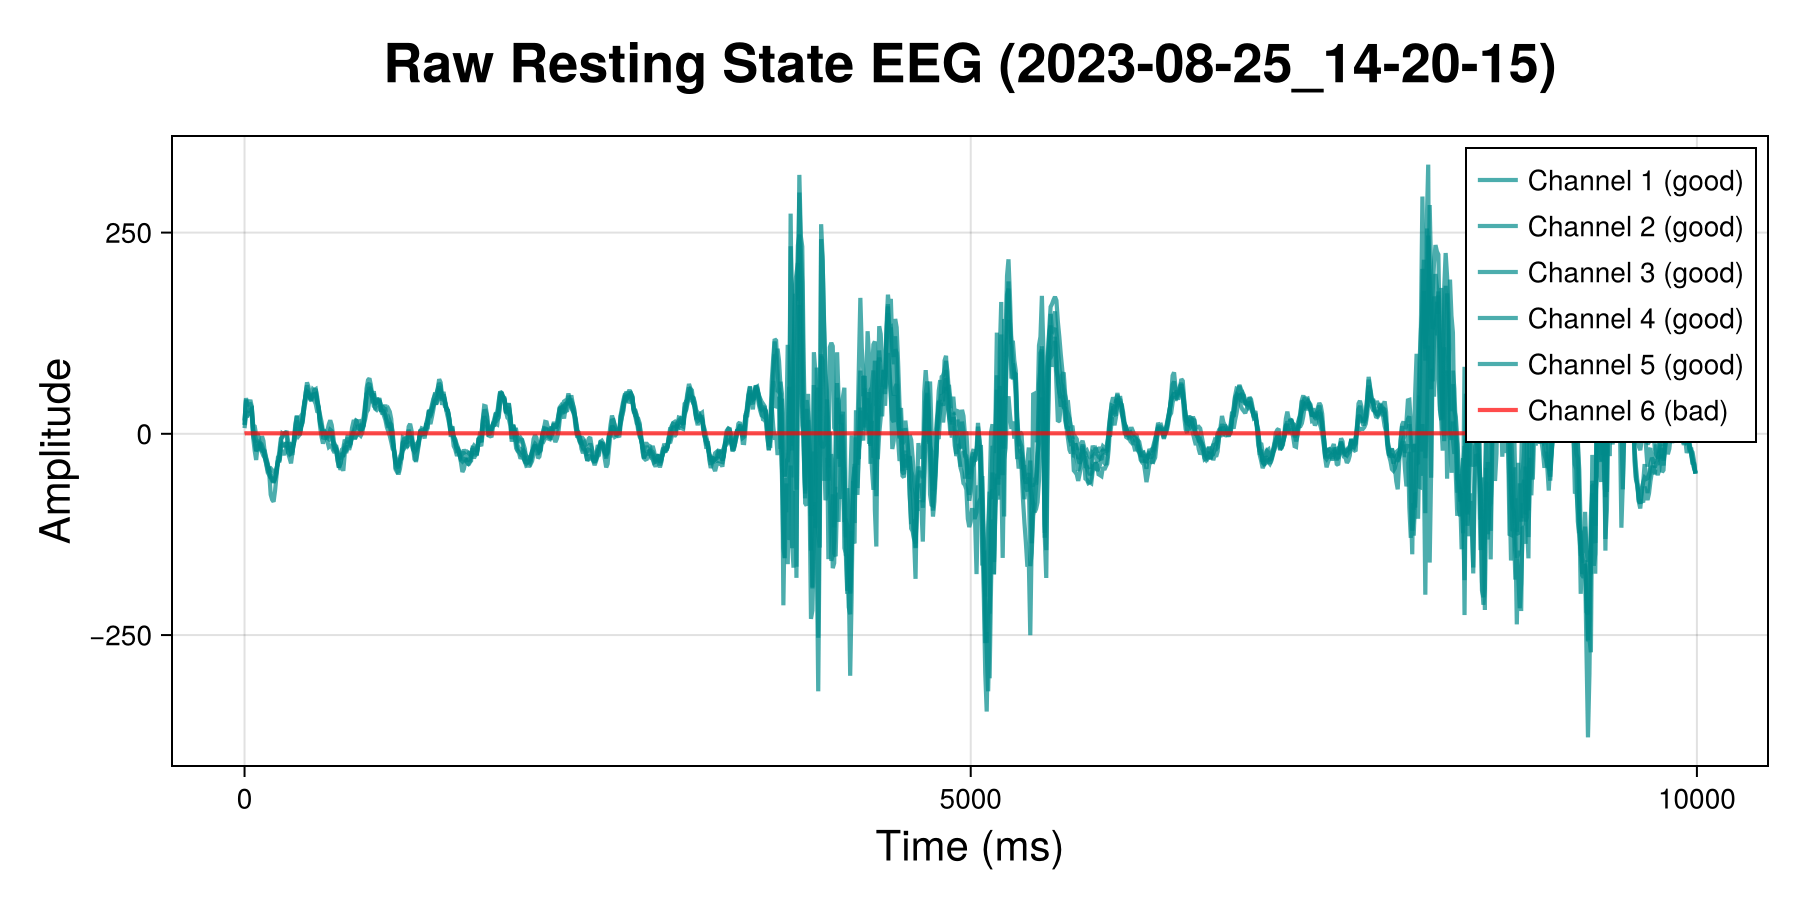

In [16]:
# set sample range for visualization 
sample_start = 1
sample_end = 1000
sample_range = sample_start:sample_end
println("Visualizing samples $sample_start to $sample_end")

# generating plot
fig = Figure(size = (900, 450))
ax = plotify(
	fig,
	position = [1,1],
	title = "Raw Resting State EEG ($name)",
	xlabel = "Time (ms)",
	ylabel = "Amplitude"
)

time_ms = (sample_range .- 1) .* 10

data = session.raw
	
for channel in 1:size(data)[1]
	lines!(
		ax,
		time_ms,
		data[channel, sample_range],
		color = channel in session.good_channels ? (:darkcyan, 0.7) : (:red, 0.7),
		label = channel in session.good_channels ? "Channel $channel (good)" : "Channel $channel (bad)",
		linewidth = 2.1
	)
end
axislegend(ax)
fig

### Bandpower Analysis

Implementation of multitaper spectral estimation and bandpower computation:

In [ ]:
# Check if session has epoched data
if hasfield(typeof(session), :data) && !isnothing(session.data)
    println("Session has epoched data with shape: $(size(session.data))")
    
    # Compute bandpower features
    println("Computing bandpower features...")
    bandpower_features, band_names = bandpower_analysis(session)
    
    # Apply logistic scaling
    println("Applying logistic scaling...")
    scaled_features = logistic_scaler(bandpower_features)
    
    println("Bandpower computation complete!")
    println("Feature shape: $(size(scaled_features))")
    println("Bands: $(band_names)")
else
    println("Session does not have epoched data. Raw data shape: $(size(session.raw))")
    println("You may need to epoch the data first.")
end

### Bandpower Visualization

Visualize the computed bandpower features: